In [2]:
%load_ext autoreload
%autoreload 2

In [51]:
import json
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.tensorboard.writer import SummaryWriter

from sklearn.model_selection import train_test_split

from common import data
from common.training import training_loop

from algos import cbl

from common.models import resnet, deeplab
from common import metrics

plt.style.use("ggplot")

In [4]:
paths = data.get_dataset_paths("../data")
train, test = train_test_split(paths, test_size=0.1, random_state=42)


In [5]:
# m_data_train = data.Marconi100Dataset(train, scaling=data.Scaling.STANDARD)
m_data_test = data.Marconi100Dataset(test, scaling=data.Scaling.STANDARD)


Loading: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]


In [6]:
horizon = 1024
stride = 512

batch_size = 32

log_dir = "./outputs/cbl"
lr = 1e-3
num_epochs = 10

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [7]:
# dataset_train = data.UnfoldedDataset(m_data_train, horizon=horizon, stride=stride)
dataset_test = data.UnfoldedDataset(m_data_test, horizon=horizon, stride=stride)

In [8]:
# train_loader = DataLoader(
#     dataset_train,
#     batch_size,
#     shuffle=True,
# )
test_loader = DataLoader(
    dataset_test,
    batch_size,
    shuffle=False,
)

In [9]:
batch = next(iter(test_loader))

In [61]:
bdata: torch.Tensor = batch["data"]
label: torch.Tensor = batch["label"]

In [75]:
pipe = cbl.pipeline(
    cbl.left_to_right_flipping(1)
)

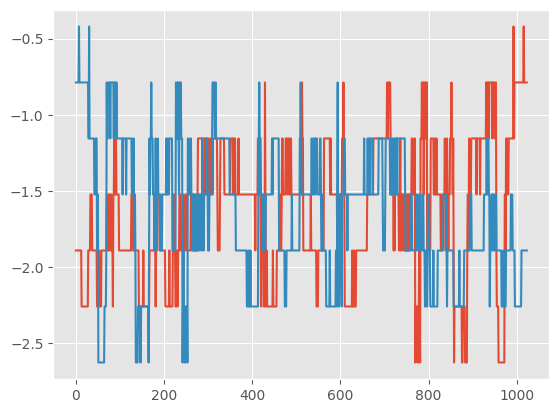

In [76]:
plt.plot(bdata[0, :, 10])
plt.plot(pipe(bdata)[0, :, 10])
plt.show()